In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.pyplot import figure
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn import metrics
from mpl_toolkits.mplot3d import Axes3D

## Analysis of Latent Space - 7 Dimensions

In [79]:
columns = ["latent_space_0","latent_space_1","latent_space_2","latent_space_3","latent_space_4",
           "latent_space_5","latent_space_6","anomaly"]
prediction_1 = pd.read_csv("../../visualisation/files/prediction/MLE_LS/artifical_2_signals.csv", sep=";")
total = prediction_1[columns]

In [80]:
total.head()

latent_space_0  latent_space_1  latent_space_2  latent_space_3  \
0        0.444841       -0.556853        0.240179       -0.281422   
1        0.126500       -0.446662        0.316357       -0.080894   
2        0.094590       -0.372622        0.281857       -0.011506   
3        0.057978       -0.276071        0.253816       -0.000141   
4        0.025026       -0.192565        0.209690        0.015146   

   latent_space_4  latent_space_5  latent_space_6  anomaly  
0       -0.414726       -0.235273        0.220986        0  
1       -0.858233       -0.312968        0.147232        0  
2       -0.808945       -0.373254        0.097531        0  
3       -0.745135       -0.427654        0.068529        0  
4       -0.667188       -0.476022        0.048455        0

In [81]:
latent_space = total.iloc[:,0:7]

In [82]:
pca = PCA(n_components=7)
columns = []
for i in range(latent_space.shape[1]):
    columns.append("pc"+str(i))
principalComponents = pca.fit_transform(latent_space)
principalDf = pd.DataFrame(data = principalComponents, columns = columns)
status = total["anomaly"]
finalDf = pd.concat([principalDf, status], axis = 1)
finalDf.head()

pc0       pc1       pc2       pc3       pc4       pc5       pc6  \
0  0.800065  0.048286  0.451834  0.270778 -0.085558  0.009283 -0.015601   
1  0.755759 -0.061855  0.318371 -0.304387 -0.080378 -0.034960  0.038863   
2  0.653028 -0.142825  0.283828 -0.306752 -0.063597 -0.009822 -0.003763   
3  0.557907 -0.208961  0.217895 -0.273299 -0.060469 -0.021788 -0.023982   
4  0.455297 -0.263736  0.162815 -0.226260 -0.051189 -0.019364 -0.037789   

   anomaly  
0        0  
1        0  
2        0  
3        0  
4        0

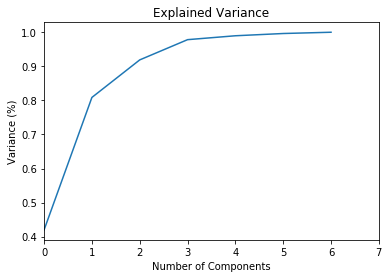

In [83]:
#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Explained Variance')
plt.xlim(0,7)
plt.show()

### Visualisation of Principal Component 0 and 1
The Blue Points are ground truth (anomaly points)

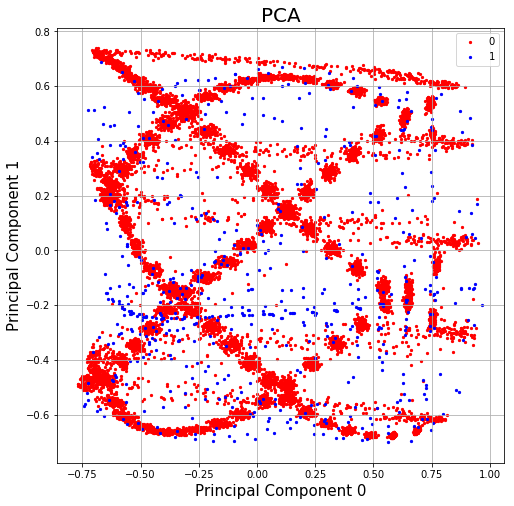

In [84]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 0', fontsize = 15)
ax.set_ylabel('Principal Component 1', fontsize = 15)
ax.set_title('PCA', fontsize = 20)
targets = [0, 1]
colors = ['r','b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['anomaly'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'pc0']
               , finalDf.loc[indicesToKeep, 'pc1']
               , c = color
               , s = 5)
ax.legend(targets)
ax.grid()

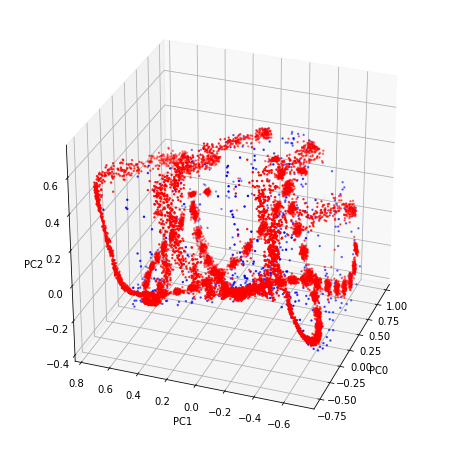

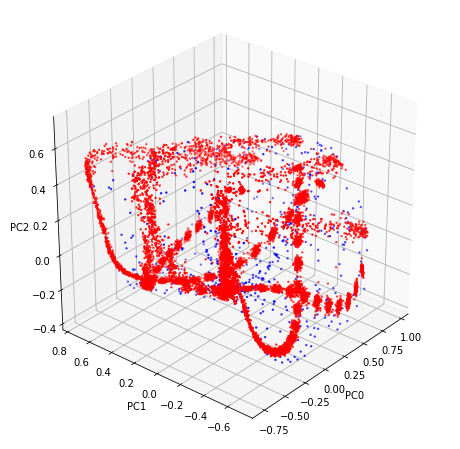

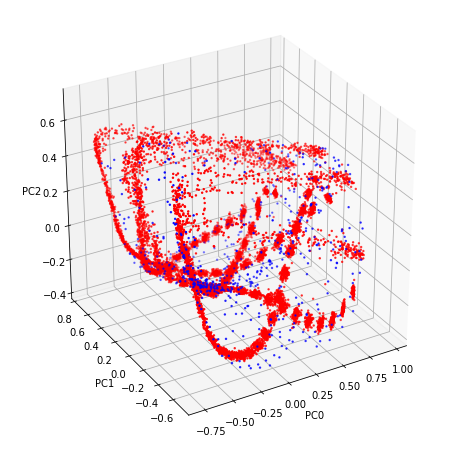

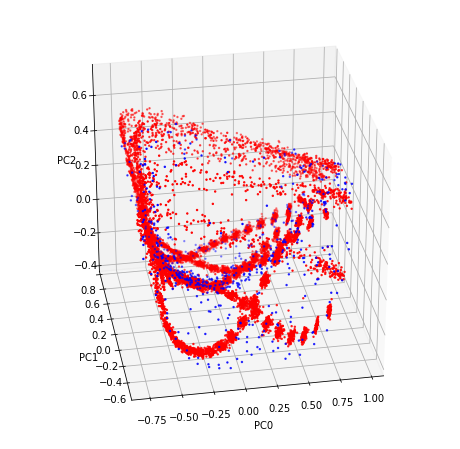

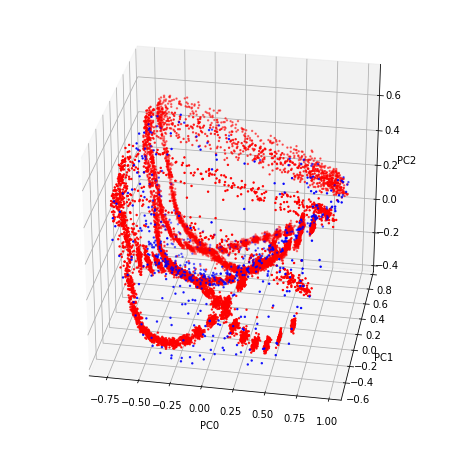

In [85]:
for i in range(200,300,20):
    fig = plt.figure()
    fig.set_figheight(8)
    fig.set_figwidth(8)
    ax = fig.add_subplot(111, projection='3d')
    targets = [0, 1]
    colors = ['r','b']
    for target, color in zip(targets,colors):
        indicesToKeep = finalDf['anomaly'] == target
        xs = finalDf.loc[indicesToKeep, 'pc0']
        ys = finalDf.loc[indicesToKeep, 'pc1']
        zs = finalDf.loc[indicesToKeep, 'pc2']
        ax.scatter(xs, ys, zs, c = color, s = 2)
        ax.view_init(azim=i)       

    ax.set_xlabel('PC0')
    ax.set_ylabel('PC1')
    ax.set_zlabel('PC2')
    plt.show()


## Visualisation of Principal Component 5 and 6

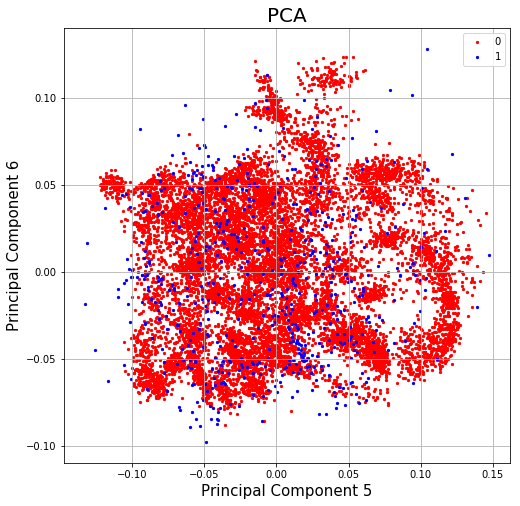

In [86]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 5', fontsize = 15)
ax.set_ylabel('Principal Component 6', fontsize = 15)
ax.set_title('PCA', fontsize = 20)
targets = [0, 1]
colors = ['r','b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['anomaly'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'pc5']
               , finalDf.loc[indicesToKeep, 'pc6']
               , c = color
               , s = 5)
ax.legend(targets)
ax.grid()

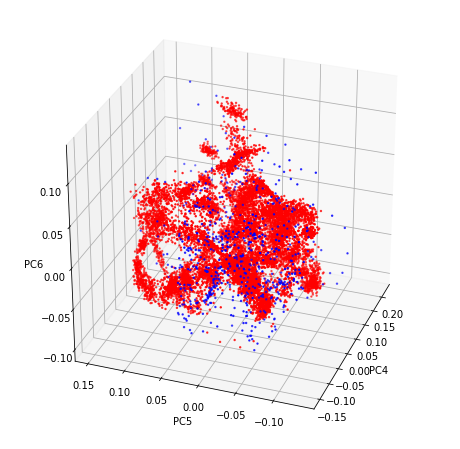

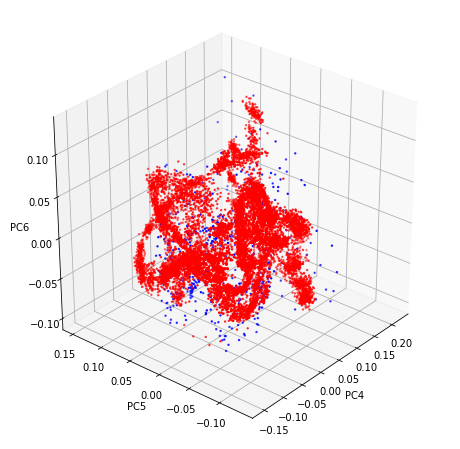

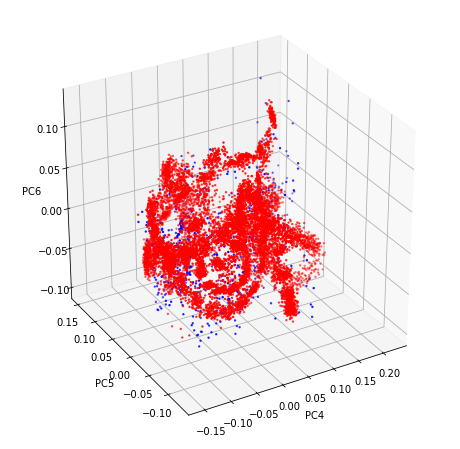

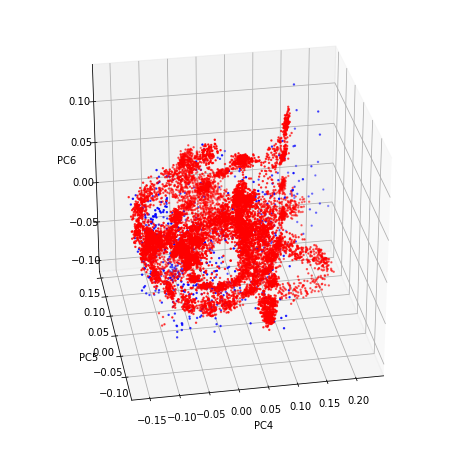

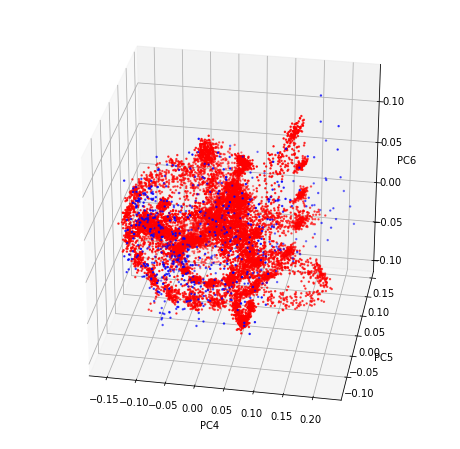

In [87]:
for i in range(200,300,20):
    fig = plt.figure()
    fig.set_figheight(8)
    fig.set_figwidth(8)
    ax = fig.add_subplot(111, projection='3d')
    targets = [0, 1]
    colors = ['r','b']
    for target, color in zip(targets,colors):
        indicesToKeep = finalDf['anomaly'] == target
        xs = finalDf.loc[indicesToKeep, 'pc4']
        ys = finalDf.loc[indicesToKeep, 'pc5']
        zs = finalDf.loc[indicesToKeep, 'pc6']
        ax.scatter(xs, ys, zs, c = color, s = 2)
        ax.view_init(azim=i)       

    ax.set_xlabel('PC4')
    ax.set_ylabel('PC5')
    ax.set_zlabel('PC6')
    plt.show()

## Analysis of Latent Space - 15 Dimensions

In [89]:
prediction_1 = pd.read_csv("../../visualisation/files/prediction/MLE_LS/artifical_2_signals_ls_15.csv", sep=";")
latent_space = prediction_1.iloc[:,10:25]

In [90]:
latent_space.head()

latent_space_0  latent_space_1  latent_space_2  latent_space_3  \
0       -0.560537        0.032586       -0.042904       -0.487973   
1       -0.346286        0.038311       -0.145152       -0.493334   
2       -0.290736        0.080251       -0.186061       -0.393752   
3       -0.205909        0.127150       -0.242748       -0.338877   
4       -0.150456        0.155203       -0.275484       -0.267087   

   latent_space_4  latent_space_5  latent_space_6  latent_space_7  \
0       -0.630027        0.068938       -0.108569        0.115959   
1       -0.503705       -0.028253       -0.142507        0.131315   
2       -0.393479       -0.094282       -0.185534        0.182747   
3       -0.307654       -0.179880       -0.224987        0.240108   
4       -0.219884       -0.235660       -0.249278        0.274839   

   latent_space_8  latent_space_9  latent_space_10  latent_space_11  \
0        0.343188        0.152243        -0.056779        -0.385560   
1        0.774224        0.263156        -0.126356        -0.320446   
2        0.743230        0.308741        -0.184829        -0.250389   
3        0.725618        0.348069        -0.238352        -0.172703   
4        0.688981        0.365834        -0.271808        -0.126060   

   latent_space_12  latent_space_13  latent_space_14  
0         0.598197        -0.034389        -0.025616  
1         0.466590        -0.138689         0.015455  
2         0.370972        -0.191174         0.083691  
3         0.310106        -0.239295         0.140836  
4         0.243266        -0.262774         0.178015

In [91]:
pca = PCA(n_components=15)
columns = []
for i in range(latent_space.shape[1]):
    columns.append("pc"+str(i))
principalComponents = pca.fit_transform(latent_space)
principalDf = pd.DataFrame(data = principalComponents, columns = columns)
status = prediction_1["anomaly"]
finalDf = pd.concat([principalDf, status], axis = 1)
finalDf.head()

pc0       pc1       pc2       pc3       pc4       pc5       pc6  \
0  0.325001  1.319975  0.574650  0.021302  0.061022 -0.126134  0.050062   
1  0.130680  1.333921  0.067156  0.038039 -0.081503 -0.126339  0.095113   
2 -0.052415  1.179325  0.000688  0.050150 -0.029371 -0.110045  0.091275   
3 -0.240386  1.060086 -0.063471  0.029145 -0.030811 -0.084477  0.076882   
4 -0.357056  0.930679 -0.106203  0.026205 -0.001466 -0.060184  0.061342   

        pc7       pc8       pc9      pc10      pc11      pc12      pc13  \
0  0.054850  0.002261  0.006590 -0.007035  0.008231  0.011816  0.005078   
1  0.033635  0.003989 -0.019842  0.008348  0.029491  0.023664  0.012997   
2  0.028800 -0.010652 -0.020952  0.006270  0.019424  0.019450  0.010674   
3  0.024987 -0.012206 -0.010511  0.007085  0.014349  0.010955  0.010788   
4  0.023355 -0.012867 -0.001591  0.006693  0.007482  0.004975  0.009601   

       pc14  anomaly  
0  0.016688        0  
1  0.006777        0  
2  0.004152        0  
3  0.001821        0  
4  0.001364        0

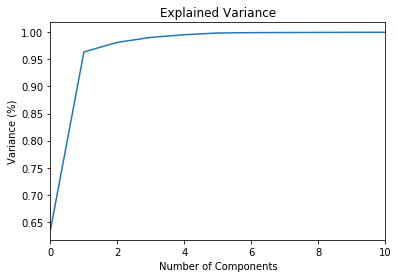

In [92]:
#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Explained Variance')
plt.xlim(0,10)
plt.show()

### Visualisation of Principal Component 0 and 1
The Blue Points are ground truth (anomaly points)

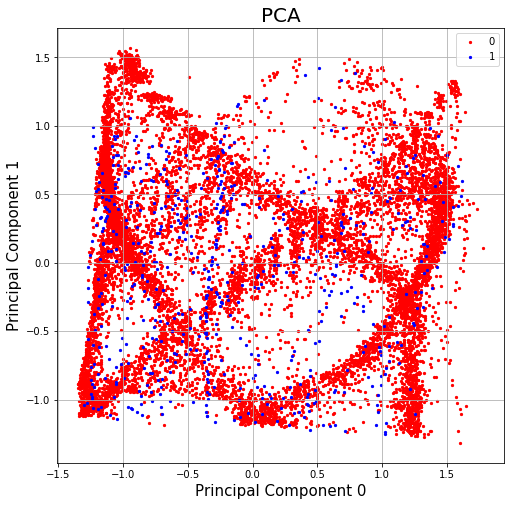

In [93]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 0', fontsize = 15)
ax.set_ylabel('Principal Component 1', fontsize = 15)
ax.set_title('PCA', fontsize = 20)
targets = [0, 1]
colors = ['r','b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['anomaly'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'pc0']
               , finalDf.loc[indicesToKeep, 'pc1']
               , c = color
               , s = 5)
ax.legend(targets)
ax.grid()

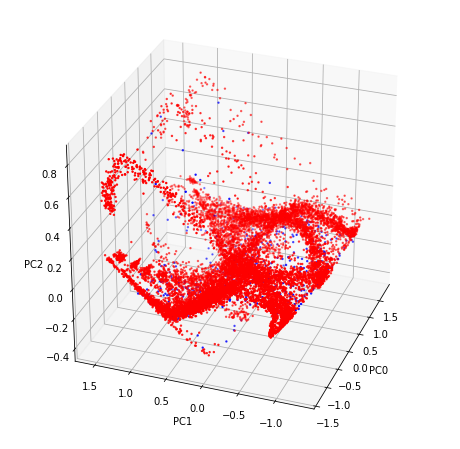

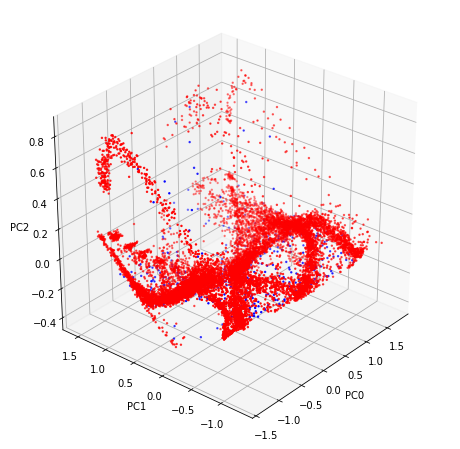

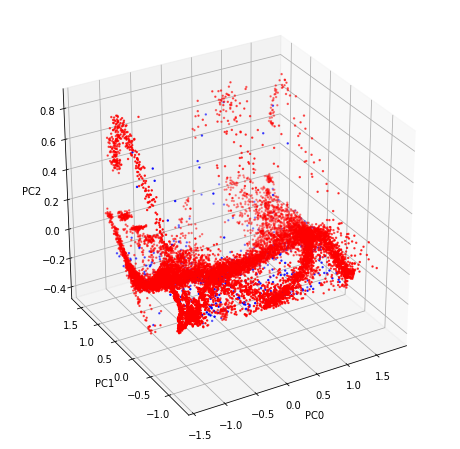

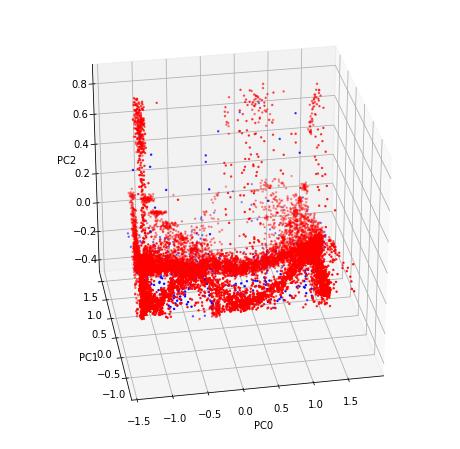

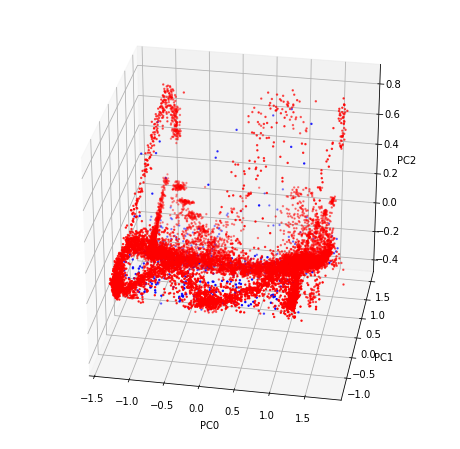

In [41]:
for i in range(200,300,20):
    fig = plt.figure()
    fig.set_figheight(8)
    fig.set_figwidth(8)
    ax = fig.add_subplot(111, projection='3d')
    targets = [0, 1]
    colors = ['r','b']
    for target, color in zip(targets,colors):
        indicesToKeep = finalDf['anomaly'] == target
        xs = finalDf.loc[indicesToKeep, 'pc0']
        ys = finalDf.loc[indicesToKeep, 'pc1']
        zs = finalDf.loc[indicesToKeep, 'pc2']
        ax.scatter(xs, ys, zs, c = color, s = 2)
        ax.view_init(azim=i)       

    ax.set_xlabel('PC0')
    ax.set_ylabel('PC1')
    ax.set_zlabel('PC2')
    plt.show()

### Visualisation of Principal Component 13 and 14
The Blue Points are ground truth (anomaly points)

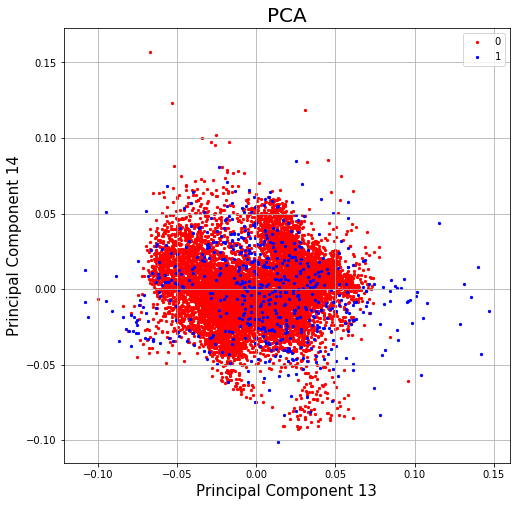

In [48]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 13', fontsize = 15)
ax.set_ylabel('Principal Component 14', fontsize = 15)
ax.set_title('PCA', fontsize = 20)
targets = [0, 1]
colors = ['r','b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['anomaly'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'pc13']
               , finalDf.loc[indicesToKeep, 'pc14']
               , c = color
               , s = 5)
ax.legend(targets)
ax.grid()

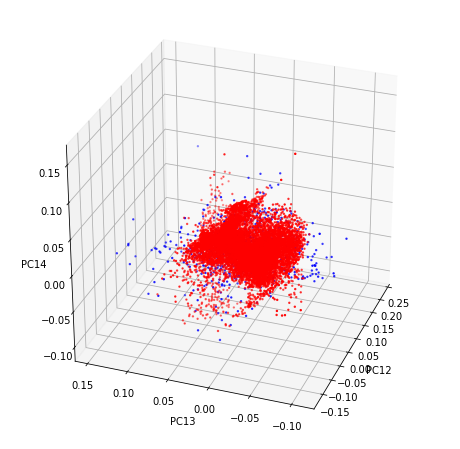

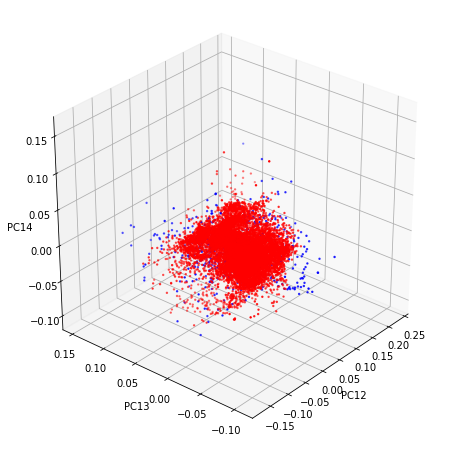

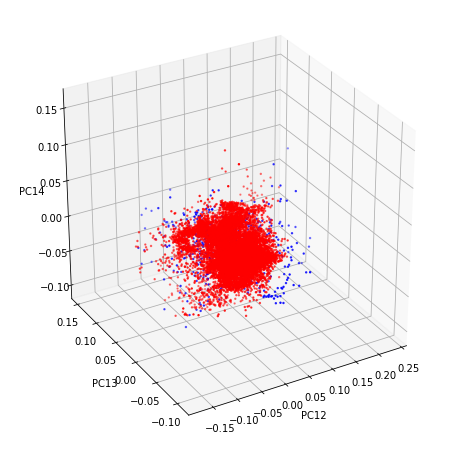

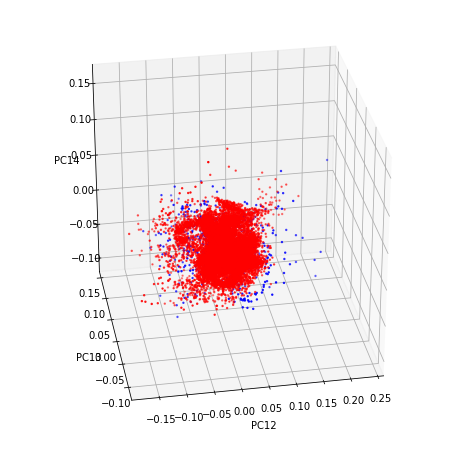

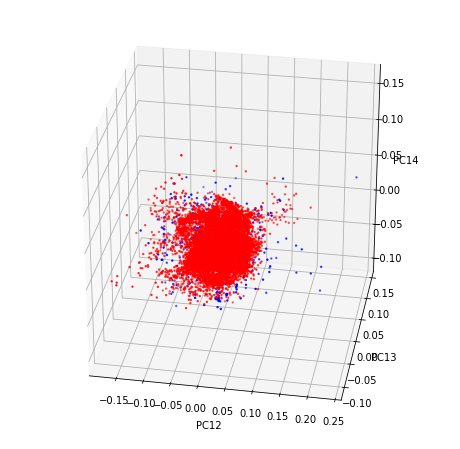

In [49]:
for i in range(200,300,20):
    fig = plt.figure()
    fig.set_figheight(8)
    fig.set_figwidth(8)
    ax = fig.add_subplot(111, projection='3d')
    targets = [0, 1]
    colors = ['r','b']
    for target, color in zip(targets,colors):
        indicesToKeep = finalDf['anomaly'] == target
        xs = finalDf.loc[indicesToKeep, 'pc12']
        ys = finalDf.loc[indicesToKeep, 'pc13']
        zs = finalDf.loc[indicesToKeep, 'pc14']
        ax.scatter(xs, ys, zs, c = color, s = 2)
        ax.view_init(azim=i)       

    ax.set_xlabel('PC12')
    ax.set_ylabel('PC13')
    ax.set_zlabel('PC14')
    plt.show()

## Analysis of Latent Space - 75 Dimensions

In [94]:
prediction_1 = pd.read_csv("../../visualisation/files/prediction/MLE_LS/artifical_2_signals_ls_75.csv", sep=";")
latent_space = prediction_1.iloc[:,10:85]

In [95]:
latent_space.head()

latent_space_0  latent_space_1  latent_space_2  latent_space_3  \
0        0.225877       -0.055724       -0.335957        0.079872   
1       -0.013535        0.097073       -0.013201        0.003325   
2       -0.082985        0.138713        0.172246       -0.045464   
3       -0.044274        0.146426        0.212611       -0.027629   
4        0.006323        0.148827        0.199123        0.000522   

   latent_space_4  latent_space_5  latent_space_6  latent_space_7  \
0        0.137177        0.045648       -0.054010        0.265715   
1        0.067868       -0.017363       -0.090656        0.069554   
2       -0.070947       -0.083990       -0.131116       -0.045819   
3       -0.129306       -0.118100       -0.146338       -0.054254   
4       -0.152203       -0.136349       -0.153643       -0.044502   

   latent_space_8  latent_space_9  ...  latent_space_65  latent_space_66  \
0       -0.098045        0.108410  ...        -0.099790         0.124577   
1        0.123926       -0.048311  ...        -0.030936         0.045104   
2        0.193055       -0.057487  ...        -0.051505        -0.079136   
3        0.214122        0.019477  ...        -0.093041        -0.174445   
4        0.208101        0.073151  ...        -0.123983        -0.229792   

   latent_space_67  latent_space_68  latent_space_69  latent_space_70  \
0         0.081441        -0.358196        -0.039313        -0.014239   
1         0.121560        -0.013288        -0.018055        -0.053272   
2         0.144673         0.181315        -0.036865        -0.088247   
3         0.145679         0.202631        -0.082377        -0.126975   
4         0.154258         0.184740        -0.114693        -0.161856   

   latent_space_71  latent_space_72  latent_space_73  latent_space_74  
0        -0.030035        -0.161342         0.031424         0.038475  
1        -0.009274         0.061989         0.067992        -0.010285  
2         0.047893         0.139528         0.092529        -0.034149  
3         0.115468         0.146374         0.131391        -0.075028  
4         0.150108         0.141158         0.158579        -0.097105  

[5 rows x 75 columns]

In [96]:
pca = PCA(n_components=75)
columns = []
for i in range(latent_space.shape[1]):
    columns.append("pc"+str(i))
principalComponents = pca.fit_transform(latent_space)
principalDf = pd.DataFrame(data = principalComponents, columns = columns)
status = prediction_1["anomaly"]
finalDf = pd.concat([principalDf, status], axis = 1)
finalDf.head()

pc0       pc1       pc2       pc3       pc4       pc5       pc6  \
0 -0.073964 -1.348894 -0.050396  0.264692 -0.167080 -0.103455  0.029964   
1 -0.211349  0.131802  0.076439 -0.085692  0.027405 -0.224607 -0.104676   
2 -0.493245  0.986521  0.022924 -0.072556  0.040093 -0.168591 -0.127207   
3 -0.819208  1.089629 -0.020018  0.077377  0.023566 -0.035112 -0.173047   
4 -1.038329  1.008176 -0.062653  0.168235 -0.026142  0.025893 -0.212538   

        pc7       pc8       pc9  ...          pc66      pc67      pc68  \
0  0.111293  0.104401  0.004789  ...  4.099785e-05 -0.000026  0.000080   
1  0.018495 -0.016718  0.136502  ...  1.006468e-04  0.000026 -0.000055   
2 -0.017140 -0.016537  0.080029  ...  9.745019e-05 -0.000007  0.000021   
3  0.017659  0.010350  0.011655  ... -7.394040e-05 -0.000085  0.000131   
4  0.011617  0.004724 -0.052393  ...  7.429811e-07  0.000026  0.000073   

       pc69      pc70      pc71      pc72      pc73      pc74  anomaly  
0 -0.000074 -0.000053 -0.000086 -0.000059 -0.000045 -0.000012        0  
1 -0.000127  0.000031  0.000042  0.000063 -0.000025 -0.000015        0  
2  0.000021 -0.000059  0.000029 -0.000028  0.000008  0.000003        0  
3  0.000045 -0.000056 -0.000060  0.000016 -0.000012  0.000029        0  
4  0.000037 -0.000069 -0.000053  0.000053 -0.000052  0.000034        0  

[5 rows x 76 columns]

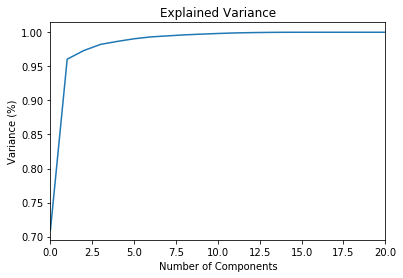

In [97]:
#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Explained Variance')
plt.xlim(0,20)
plt.show()

### Visualisation of Principal Component 1 and 2
The Blue Points are ground truth (anomaly points)

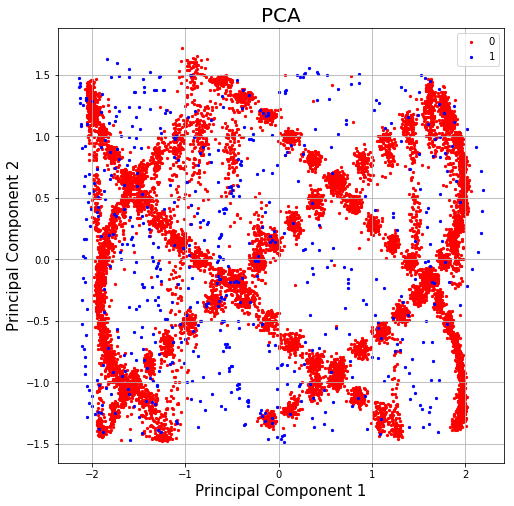

In [98]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('PCA', fontsize = 20)
targets = [0, 1]
colors = ['r','b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['anomaly'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'pc0']
               , finalDf.loc[indicesToKeep, 'pc1']
               , c = color
               , s = 5)
ax.legend(targets)
ax.grid()

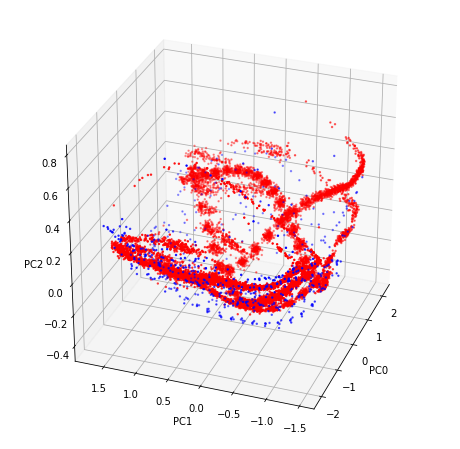

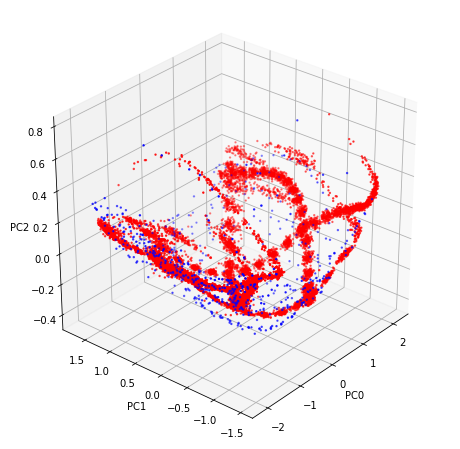

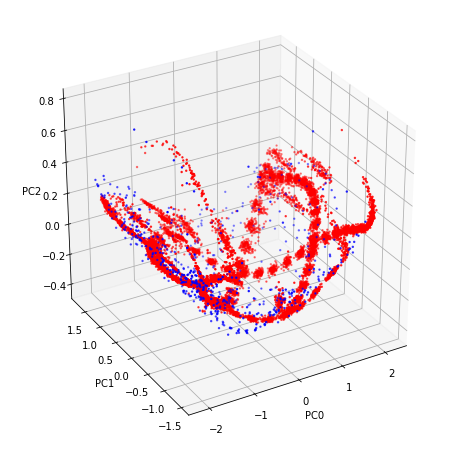

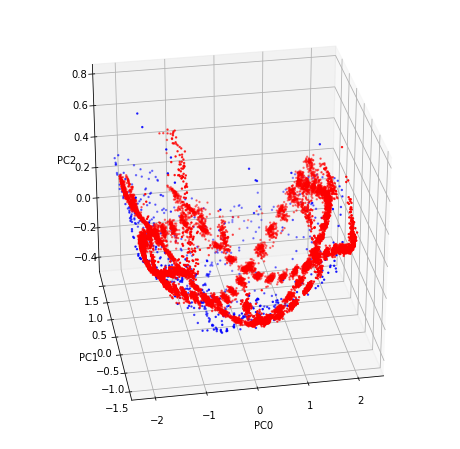

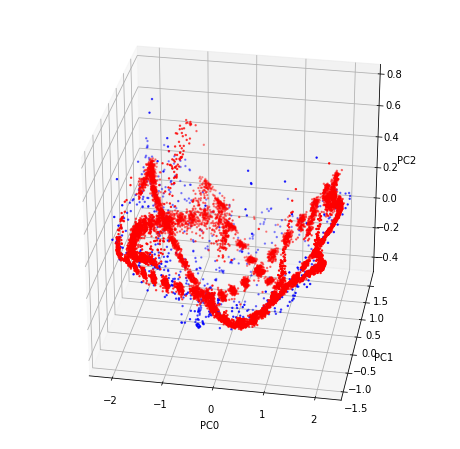

In [99]:
for i in range(200,300,20):
    fig = plt.figure()
    fig.set_figheight(8)
    fig.set_figwidth(8)
    ax = fig.add_subplot(111, projection='3d')
    targets = [0, 1]
    colors = ['r','b']
    for target, color in zip(targets,colors):
        indicesToKeep = finalDf['anomaly'] == target
        xs = finalDf.loc[indicesToKeep, 'pc0']
        ys = finalDf.loc[indicesToKeep, 'pc1']
        zs = finalDf.loc[indicesToKeep, 'pc2']
        ax.scatter(xs, ys, zs, c = color, s = 2)
        ax.view_init(azim=i)       

    ax.set_xlabel('PC0')
    ax.set_ylabel('PC1')
    ax.set_zlabel('PC2')
    plt.show()

### Visualisation of Principal Component 73 and 74
The Blue Points are ground truth (anomaly points)

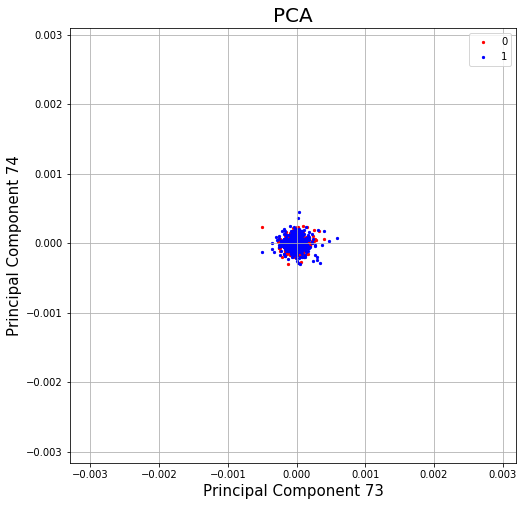

In [106]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 73', fontsize = 15)
ax.set_ylabel('Principal Component 74', fontsize = 15)
ax.set_title('PCA', fontsize = 20)
targets = [0, 1]
colors = ['r','b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['anomaly'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'pc73']
               , finalDf.loc[indicesToKeep, 'pc74']
               , c = color
               , s = 5)
ax.legend(targets)
ax.grid()

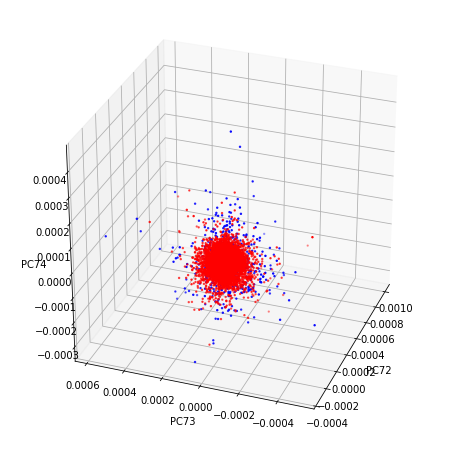

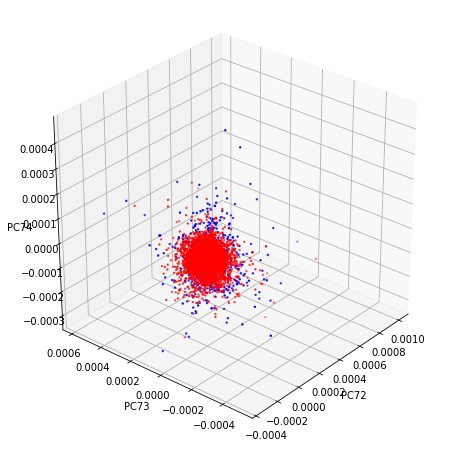

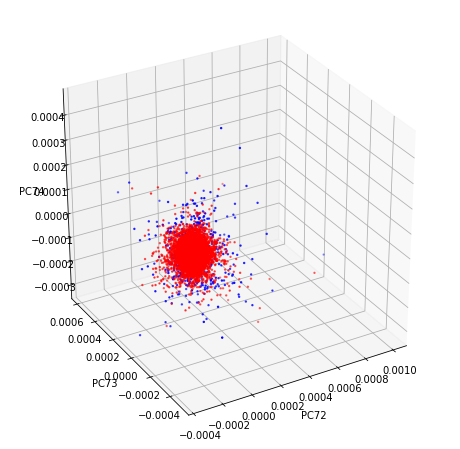

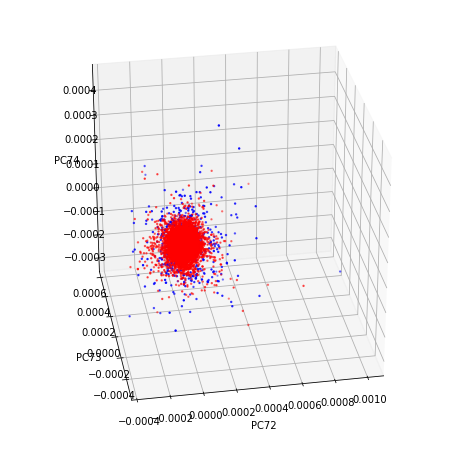

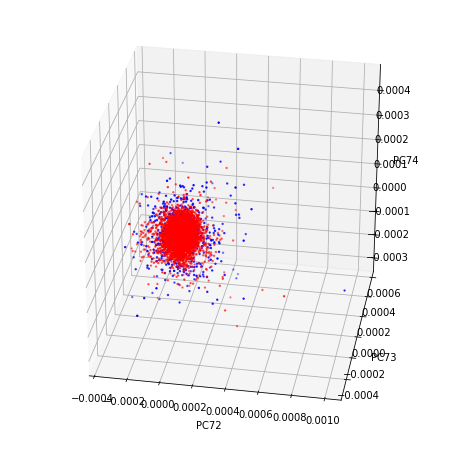

In [101]:
for i in range(200,300,20):
    fig = plt.figure()
    fig.set_figheight(8)
    fig.set_figwidth(8)
    ax = fig.add_subplot(111, projection='3d')
    targets = [0, 1]
    colors = ['r','b']
    for target, color in zip(targets,colors):
        indicesToKeep = finalDf['anomaly'] == target
        xs = finalDf.loc[indicesToKeep, 'pc72']
        ys = finalDf.loc[indicesToKeep, 'pc73']
        zs = finalDf.loc[indicesToKeep, 'pc74']
        ax.scatter(xs, ys, zs, c = color, s = 2)
        ax.view_init(azim=i)       

    ax.set_xlabel('PC72')
    ax.set_ylabel('PC73')
    ax.set_zlabel('PC74')
    plt.show()